In [ ]:
import pandas as pd
import numpy as np

# Q.1

In [ ]:
df1=pd.read_csv('data.tsv', sep='\t')

In [ ]:
df1.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.8,1422.0
1,tt0000002,6.4,168.0
2,tt0000003,6.6,1015.0
3,tt0000004,6.4,100.0
4,tt0000005,6.2,1713.0
5,tt0000006,5.5,88.0
6,tt0000007,5.5,573.0
7,tt0000008,5.6,1526.0
8,tt0000009,5.5,70.0
9,tt0000010,6.9,5083.0


In [ ]:

df2=pd.read_csv('data-2.tsv', sep='\t')

In [ ]:
df2.head(10)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0.0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0.0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0.0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1.0
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1.0
5,tt0000002,2,A bohóc és kutyái,HU,\N,imdbDisplay,\N,0.0
6,tt0000002,3,Le clown et ses chiens,FR,\N,\N,\N,0.0
7,tt0000002,4,Clovnul si cainii sai,RO,\N,imdbDisplay,\N,0.0
8,tt0000002,5,The Clown and His Dogs,US,\N,\N,literal English title,0.0
9,tt0000002,6,Клоун и его собаки,RU,\N,\N,\N,0.0


In [ ]:
df3=pd.read_csv('data-3.tsv', sep='\t')

In [ ]:
df3.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0.0,1894.0,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0.0,1894.0,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0.0,1894.0,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894.0,\N,45,Romance
9,tt0000010,short,Employees Leaving the Lumière Factory,La sortie de l'usine Lumière à Lyon,0.0,1895.0,\N,1,"Documentary,Short"


# Q.2

In [ ]:
duplicate=df1[df1.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [tconst, averageRating, numVotes]
Index: []


In [ ]:
duplicate=df2[df2.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [titleId, ordering, title, region, language, types, attributes, isOriginalTitle]
Index: []


In [ ]:
duplicate=df3[df3.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [tconst, titleType, primaryTitle, originalTitle, isAdult, startYear, endYear, runtimeMinutes, genres]
Index: []


In [ ]:
df1.duplicated().sum()

0

In [ ]:
df2.duplicated().sum()

0

In [ ]:
df3.duplicated().sum()

0

In [ ]:
df2.rename(columns = {'titleId':'tconst'}, inplace = True)

In [ ]:
df2.head()

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0.0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0.0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0.0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1.0
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1.0


# Q.3

In [ ]:
#Inner Join
merged_df = pd.merge(pd.merge(df1,df2,on='tconst'),df3,on='tconst')

In [ ]:
len(merged_df)

17564

In [ ]:
merged_df['titleType'].unique()

array(['short', 'movie'], dtype=object)

In [ ]:
merged_df['titleType'].nunique()

2

# Q.4

In [ ]:
df_new = merged_df[(merged_df['language'] == 'en') | (merged_df['region'] == 'US') & (merged_df['titleType']== 'movie') ]

# Q.5

In [ ]:
df_new.head()

,tconst,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
51,tt0000009,5.5,70.0,3,Miss Jerry,US,\N,\N,\N,0.0,movie,Miss Jerry,Miss Jerry,0.0,1894.0,\N,45,Romance
74,tt0000012,7.4,8509.0,11,The Arrival of a Train,XWW,en,imdbDisplay,\N,0.0,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896.0,\N,1,"Documentary,Short"
76,tt0000012,7.4,8509.0,13,The Arrival of a Train at La Ciotat,XWW,en,alternative,\N,0.0,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896.0,\N,1,"Documentary,Short"
85,tt0000012,7.4,8509.0,21,The Arrival of a Train,XEU,en,imdbDisplay,\N,0.0,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896.0,\N,1,"Documentary,Short"
131,tt0000016,5.9,967.0,1,Boat Leaving the Port,XWW,en,\N,informal title,0.0,short,Barque sortant du port,Barque sortant du port,0.0,1895.0,\N,1,"Documentary,Short"


In [ ]:
df_new.loc[df_new['log10Votes'] == np.log10(df_new['numVotes'])]

,tconst,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,log10Votes
51,tt0000009,5.5,70.0,3,Miss Jerry,US,\N,\N,\N,0.0,movie,Miss Jerry,Miss Jerry,0.0,1894.0,\N,45,Romance,1.845098
74,tt0000012,7.4,8509.0,11,The Arrival of a Train,XWW,en,imdbDisplay,\N,0.0,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896.0,\N,1,"Documentary,Short",3.929879
76,tt0000012,7.4,8509.0,13,The Arrival of a Train at La Ciotat,XWW,en,alternative,\N,0.0,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896.0,\N,1,"Documentary,Short",3.929879
85,tt0000012,7.4,8509.0,21,The Arrival of a Train,XEU,en,imdbDisplay,\N,0.0,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896.0,\N,1,"Documentary,Short",3.929879
131,tt0000016,5.9,967.0,1,Boat Leaving the Port,XWW,en,\N,informal title,0.0,short,Barque sortant du port,Barque sortant du port,0.0,1895.0,\N,1,"Documentary,Short",2.985426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17546,tt0016130,7.8,5.0,2,No Fight Without Money,XWW,en,alternative,\N,0.0,movie,Musen Fusen Uchien Puchan,Musen Fusen Uchien Puchan,0.0,1925.0,\N,\N,\N,0.698970
17547,tt0016130,7.8,5.0,3,"No Money, No War",XWW,en,alternative,\N,0.0,movie,Musen Fusen Uchien Puchan,Musen Fusen Uchien Puchan,0.0,1925.0,\N,\N,\N,0.698970
17550,tt0016130,7.8,5.0,6,"No Money, No Fight",XWW,en,alternative,\N,0.0,movie,Musen Fusen Uchien Puchan,Musen Fusen Uchien Puchan,0.0,1925.0,\N,\N,\N,0.698970
17554,tt0016134,7.7,6.0,1,My Lady's Lips,US,\N,\N,\N,0.0,movie,My Lady's Lips,My Lady's Lips,0.0,1925.0,\N,70,"Crime,Drama",0.778151


# Q.6

In [ ]:
df_new['genres']=df_new['genres'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_new.head()

,tconst,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,log10Votes
51,tt0000009,5.5,70.0,3,Miss Jerry,US,\N,\N,\N,0.0,movie,Miss Jerry,Miss Jerry,0.0,1894.0,\N,45,romance,1.845098
74,tt0000012,7.4,8509.0,11,The Arrival of a Train,XWW,en,imdbDisplay,\N,0.0,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896.0,\N,1,"documentary,short",3.929879
76,tt0000012,7.4,8509.0,13,The Arrival of a Train at La Ciotat,XWW,en,alternative,\N,0.0,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896.0,\N,1,"documentary,short",3.929879
85,tt0000012,7.4,8509.0,21,The Arrival of a Train,XEU,en,imdbDisplay,\N,0.0,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896.0,\N,1,"documentary,short",3.929879
131,tt0000016,5.9,967.0,1,Boat Leaving the Port,XWW,en,\N,informal title,0.0,short,Barque sortant du port,Barque sortant du port,0.0,1895.0,\N,1,"documentary,short",2.985426


In [ ]:
df_new.groupby('genres')['log10Votes'].mean().nlargest(10)

genres
documentary,fantasy,horror     3.982135
fantasy,horror,mystery         3.976099
comedy,romance,thriller        3.942504
fantasy,horror                 3.909337
drama,thriller,western         3.904932
comedy,drama,family            3.859733
crime,mystery,thriller         3.794349
comedy,war                     3.690728
adventure,fantasy,sci-fi       3.671516
adventure,animation,fantasy    3.648262
Name: log10Votes, dtype: float64

In [ ]:
df_new.groupby('genres')['averageRating'].mean().nlargest(10)

genres
action,comedy,sport            8.3
adventure,fantasy,romance      7.9
comedy,romance,thriller        7.9
crime,mystery,thriller         7.9
drama,romance,thriller         7.9
drama,thriller,western         7.9
adventure,animation,fantasy    7.8
animation,comedy,short         7.8
documentary,fantasy,horror     7.7
drama,fantasy,thriller         7.7
Name: averageRating, dtype: float64

## Q.7

In [ ]:
df_new.groupby('averageRating')
df_new.plot.scatter(x='averageRating', y='log10Votes')

## Q.8

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X = df_new.iloc[:, 1].values.reshape(-1, 1)
y = df_new.iloc[:, -1].values.reshape(-1, 1)

In [ ]:
print(X)

In [ ]:
print(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('averageRating vs log10Votes (Training Set)')
plt.xlabel('averageRating')
plt.ylabel('log10Votes')
plt.show()

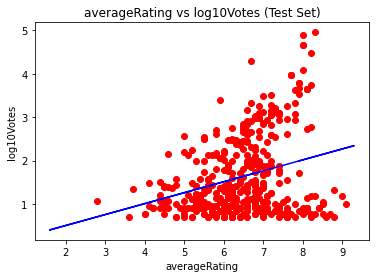

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('averageRating vs log10Votes (Test Set)')
plt.xlabel('averageRating')
plt.ylabel('log10Votes')
plt.show()

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

[0.00222876]
[[0.25195654]]


Linear Regression Using Scipy

In [ ]:
from scipy import stats
from scipy.stats import linregress


In [ ]:
x = df_new.iloc[:, 1].values.reshape(-1, 1)
y = df_new.iloc[:, -1].values.reshape(-1, 1)

In [ ]:
slope, intercept, r_value, p_value, stderr = linregress(x, y)

In [ ]:
plt.scatter(x,y, color="red", marker="o", label="averageRating vs log10Votes")
 
 
y_pred = intercept + slope*x
plt.plot(x,y_pred, color="green", label="Fitted line")
 
plt.legend(loc='best')
plt.xlabel('averageRating') 
plt.ylabel('log10Votes') 
 

Linear Regression using Pytorch

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [ ]:
x_values = df_new.iloc[:, 1].values
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

In [ ]:
y_values = df_new.iloc[:, -1].values
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [ ]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
inputDim = 1        
outputDim = 1       
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)
if torch.cuda.is_available():
    model.cuda()

In [ ]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [ ]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    optimizer.zero_grad()

    outputs = model(inputs)

    loss = criterion(outputs, labels)
    print(loss)
    loss.backward()

    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(3.6778, grad_fn=<MseLossBackward0>)
epoch 0, loss 3.6777961254119873
tensor(0.7677, grad_fn=<MseLossBackward0>)
epoch 1, loss 0.7677470445632935
tensor(0.7232, grad_fn=<MseLossBackward0>)
epoch 2, loss 0.723159670829773
tensor(0.7225, grad_fn=<MseLossBackward0>)
epoch 3, loss 0.7224764823913574
tensor(0.7225, grad_fn=<MseLossBackward0>)
epoch 4, loss 0.722465991973877
tensor(0.7225, grad_fn=<MseLossBackward0>)
epoch 5, loss 0.7224658131599426
tensor(0.7225, grad_fn=<MseLossBackward0>)
epoch 6, loss 0.7224657535552979
tensor(0.7225, grad_fn=<MseLossBackward0>)
epoch 7, loss 0.7224657535552979
tensor(0.7225, grad_fn=<MseLossBackward0>)
epoch 8, loss 0.7224657535552979
tensor(0.7225, grad_fn=<MseLossBackward0>)
epoch 9, loss 0.7224656939506531
tensor(0.7225, grad_fn=<MseLossBackward0>)
epoch 10, loss 0.7224656939506531
tensor(0.7225, grad_fn=<MseLossBackward0>)
epoch 11, loss 0.7224656939506531
tensor(0.7225, grad_fn=<MseLossBackward0>)
epoch 12, loss 0.7224656939506531
tensor(0.72

[[1.3852675]
 [1.8800396]
 [1.8800396]
 ...
 [1.9842023]
 [1.9581615]
 [1.7237958]]


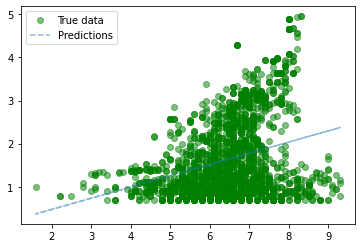

In [ ]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()